In [ ]:
import pandas as pd
import numpy as np
import seaborn as sea
import matplotlib as plt
import regex as re


In [ ]:

import pandas as pd

df2 = pd.read_excel('/content/Coupon_Less_Than_1.xlsx')
df1 = pd.read_excel('/content/Loss_Detection.xlsx')


# Assuming you have loaded the two DataFrames 'Coupon_greater_than_1' and 'Loss_Detection' from your data source

# Identify the duplicate 'Phone' values in 'Repeated_Coupons_Receivers'
duplicate_phones = df2['Phone']

# If df1 contains df2, Create a new Column in df1 ['Coupon_Counts>1'], if found, than update the 'Coupon_Counts>1' rows as 'Coupon_Counts>1' else 'Coupon_Counts<1'


Loss_Detection = df1[df1['Phone'].isin(duplicate_phones)]

# Assuming you have loaded your DataFrame df1 and have a list of duplicate phones named duplicate_phones

# Create a new column 'Coupon_Count>1' based on the condition
df1['Coupon_Count>1'] = df1['Phone'].apply(lambda x: 'Coupon_Count>1' if x in duplicate_phones else 'Not Considered')

# Display the value counts of the 'Coupon_Count>1' column
value_counts = df1['Coupon_Count>1'].value_counts()
print(value_counts)

# Save the DataFrame to an Excel file
df1.to_excel('/content/loss_detection_stuff_new.xlsx', index=False)


Not Considered    254
Name: Coupon_Count>1, dtype: int64


Read the Dataset 'Loss Detection', then iterate through dataframe columns ['Phone', 'Coupon Discount'], Than Develop Two Dataframes on the basis of Coupon Counts =1 AND Coupon Counts = > 1


In [ ]:
import pandas as pd

# Read the Excel file into a DataFrame
df = pd.read_excel('/content/Loss_Detection.xlsx')

# Create a dictionary to store the counts of each 'Phone' value
phone_counts = {}

# Iterate through the DataFrame
for index, row in df.iterrows():
    phone = row['Phone']
    discount = row['Coupon Discount']

    # Check if the 'Phone' value has been seen before
    if phone in phone_counts:
        # Increment the count for this 'Phone' value
        phone_counts[phone] += 1
    else:
        # Initialize the count for this 'Phone' value
        phone_counts[phone] = 1

    # Update the 'Coupon Discount' column based on the count
    if phone_counts[phone] > 1:
        df.at[index, 'Coupon Discount'] = f"{discount} X {phone_counts[phone]}"



# Now, 'df' contains only the rows where 'Coupon Discount' contains 'X' and keeps only the last one
df.to_excel('/content/Coupon_Count(1)_on_the_basis_of_loss.xlsx', index =False)

#Check Duplicates

duplicates = df[df['Phone'].duplicated(keep=False)]
print(duplicates)
duplicates.to_excel('/content/Coupon_Count>1_on_the_basis_of_loss.xlsx', index = False)

     Order ID  Product Value  COD Amount  Purchase Price Coupon Discount  \
15     196720           1699        1199            1500             500   
21     199966          43300       42800           48500             500   
35     205525           1550        1050            1450         500 X 2   
36     205976            799          49             610             500   
41     210708            799          49             610             500   
46     212394           2299        1799            2000         500 X 3   
50     213273           2299        1799            2000             500   
60     220796           2299        1799            2000         500 X 2   
69     223840            549          22             475         500 X 2   
78     227235           3150        2650            2750             500   
79     227462           3150        2386            2750         500 X 2   
95     238057           1850        1350            1850             500   
133    25503

**Now, Remove Rows from 'Coupon_Count=1' Where 'Phone' is present 'Coupon_Counts>1'**

Order ID  Product Value  COD Amount  Purchase Price  Coupon Discount  Product Title                     Coupon Code     Consignee Name   Phone         Status   
188106    5399           4899        5200            250              MI Band 6                         POCAR-CAB1K7EZ  Azim Arif        923015628046  delivered    1
265863    1749           1249        1550            500              Mi Type-C Charger (20W)           POCAR-CA66U59X  Abdul Qadoos     923325779002  delivered    1
267695    6099           5599        5837            500              Oraimo FreePods 3                 POCAR-CAD6FKWL  Saad Mansoor     923222249347  delivered    1
268029    2999           2499        2650            500              MI True Wireless Earbuds Basic 2  POCAR-CAFY0REL  Umair Younas     923044149542  delivered    1
268162    2399           1899        2250            500              Letscom TWS Earbuds T30           POCAR-CACPFPOY  Hina Lodhi       923425462733  delivered    1
         

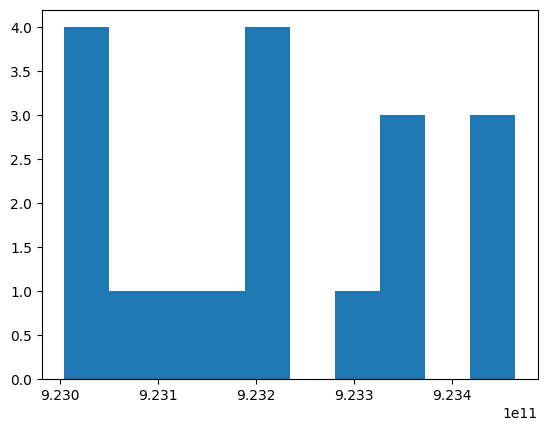

In [8]:
import pandas as pd
import matplotlib.pyplot as plt

df1  = pd.read_excel('/content/Coupon_Count_1_on_the_basis_of_loss.xlsx')
df2 = pd.read_excel('/content/Coupon_greater_than_1_.xlsx')

# Assuming you have loaded the two DataFrames 'Coupon_Count' and 'Repeated_Coupons_Receivers' from your data source

# Identify the duplicate 'Phone' values in 'Repeated_Coupons_Receivers'
duplicate_phones = df2['Phone']

# Filter 'Coupon_Count' to keep only rows where 'Phone' is not in 'duplicate_phones'
Coupon_Count = df1[~df1['Phone'].isin(duplicate_phones)]
print(Coupon_Count.value_counts())
print(plt.hist(duplicate_phones))

# Now, 'Coupon_Count' will contain only the rows where 'Phone' is not a duplicate in 'Repeated_Coupons_Receivers'
Coupon_Count.to_excel('/content/coupon_count(1)_on_the_basis_of_loss.xlsx', index = False)